Importing Libraries

In [1]:
import pandas as pd
import numpy as np

Access Google Drive Contents

In [5]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Load Dataset

In [6]:
fileName = r"/gdrive/My Drive/ML project datasets/digit.csv"
dataset = pd.read_csv(fileName) 

Summarise Dataset

In [8]:
print(dataset.shape)
print(dataset.head(5))

(42000, 785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0      

Seggregating dataset into X and Y

In [9]:
X = dataset.iloc[:,1:]
print(X)
print(X.shape)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [10]:
Y = dataset.iloc[:,0]
print(Y)
print(Y.shape)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64
(42000,)


Splitting the dataset into train and test

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)
len(X_train),len(X_test),len(Y_train),len(Y_test)

(31500, 10500, 31500, 10500)

Training

In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=1000)

In [24]:
y_pred = model.predict(X_test)

Model Accuracy

In [25]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model: {0}%'.format(accuracy_score(Y_test,y_pred)*100))

Accuracy of the model: 96.51428571428572%


Predicted9


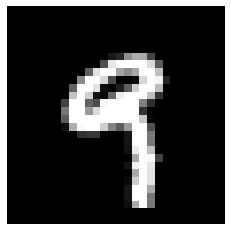

In [26]:
import matplotlib.pyplot as plt
index = 20
print("Predicted" + str(model.predict(X_test)[index]))
plt.axis('off')
plt.imshow(X_test.iloc[index].values.reshape((28,28)),cmap='gray')

In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1015
           1       0.99      0.98      0.99      1190
           2       0.96      0.97      0.96      1077
           3       0.96      0.95      0.95      1070
           4       0.97      0.97      0.97      1034
           5       0.97      0.97      0.97       930
           6       0.97      0.98      0.98      1044
           7       0.97      0.95      0.96      1129
           8       0.95      0.95      0.95       995
           9       0.95      0.94      0.95      1016

    accuracy                           0.97     10500
   macro avg       0.96      0.96      0.96     10500
weighted avg       0.97      0.97      0.97     10500

